In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, multilabel_confusion_matrix, f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from ucimlrepo import fetch_ucirepo

In [26]:
# De la carpeta breast_cancer, extrae todos los .json
# y los guarda en un diccionario
# El diccionario tiene como key el nombre del archivo
import os
import json

def get_jsons(path):

    jsons = {}
    for file in os.listdir(path):
        if file.endswith(".json"):
            with open(os.path.join(path, file)) as f:
                name = file.split(".")[0].split("_")[-1]
                jsons[name] = json.load(f)
    return jsons

In [21]:
breast_cancer = get_jsons()

In [22]:
breast_cancer.keys()

dict_keys(['cart', 'kde', 'knn', 'rf', 'svm'])

In [24]:
df_breast_cancer = pd.DataFrame()

df_breast_cancer['CART'] = pd.Series(breast_cancer["cart"])
df_breast_cancer['KNN'] = pd.Series(breast_cancer["knn"])
df_breast_cancer['KDE'] = pd.Series(breast_cancer["kde"])
df_breast_cancer['RF'] = pd.Series(breast_cancer["rf"])
df_breast_cancer['SVM'] = pd.Series(breast_cancer["svm"])

df_breast_cancer = df_breast_cancer.drop('confusion_matrix')

In [25]:
df_breast_cancer

,CART,KNN,KDE,RF,SVM
accuracy,0.956204,0.956204,0.948905,0.963504,0.956204
f1,0.938776,0.938776,0.924731,0.949495,0.938776
recall,0.958333,0.958333,0.895833,0.979167,0.958333
precision,0.92,0.92,0.955556,0.921569,0.92
time,0.119257,11.682686,1.049208,686.071113,12.407184
best_params,cp = {'ccp_alpha': 0.0003},k = 7,h = {'bandwidth': 3.3},"n = 100, m = 0.2, s = 0.1","C = 69, gamma = 0.0001, kernel = rbf"


In [39]:
rice = get_jsons("rice")

In [40]:
df_rice = pd.DataFrame()

df_rice['CART'] = pd.Series(rice["cart"])
df_rice['KNN'] = pd.Series(rice["knn"])
df_rice['KDE'] = pd.Series(rice["kde"])
df_rice['RF'] = pd.Series(rice["rf"])
df_rice['SVM'] = pd.Series(rice["svm"])

df_rice = df_rice.drop('confusion_matrix')

In [41]:
df_rice

,CART,KNN,KDE,RF,SVM
accuracy,0.91601,0.909449,0.895013,0.914698,0.914698
f1,0.927765,0.92168,0.910714,0.926719,0.926719
recall,0.942661,0.931193,0.93578,0.942661,0.942661
precision,0.913333,0.91236,0.886957,0.911308,0.911308
time,2.355782,401.913106,10.272766,686.071113,28.335657
best_params,cp = {'ccp_alpha': 0.002},k = 7,h = {'bandwidth': 1.3},"n = 100, m = 0.2, s = 0.1","C = 6, gamma = scale, kernel = rbf"


In [73]:
dry_bean = get_jsons("dry_bean")

In [55]:
df_dry_bean = pd.DataFrame()

df_dry_bean['CART'] = pd.Series(dry_bean["cart"])
df_dry_bean['KNN'] = pd.Series(dry_bean["knn"])
df_dry_bean['KDE'] = pd.Series(dry_bean["kde"])
df_dry_bean['RF'] = pd.Series(dry_bean["rf"])
df_dry_bean['SVM'] = pd.Series(dry_bean["svm"])

df_dry_bean = df_dry_bean.drop('confusion_matrix')
df_dry_bean = df_dry_bean.drop('support')

In [56]:
df_dry_bean

,CART,KNN,KDE,RF,SVM
accuracy,0.883584,0.731179,0.860448,0.930224,0.915167
precision_macro,0.900313,0.742364,0.873899,0.940783,0.9279
recall_macro,0.888333,0.732003,0.859573,0.937888,0.924443
f1-score_macro,0.89349,0.735181,0.863039,0.939266,0.925836
time,42.283521,3096.580188,193.348351,4207.323831,661.543245
best_params,cp = {'ccp_alpha': 0.015},k = 8,h = {'bandwidth': 1.0},"n = 50, m = 0.8, s = None","C = 1, gamma = 'scaled', kernel = linear"


In [76]:
# Save table in .tex
df_breast_cancer.to_latex('breast_cancer.tex')
df_rice.to_latex('rice.tex')
df_dry_bean.to_latex('dry_bean.tex')

C:\Users\felip\AppData\Local\Temp\ipykernel_1376\1450866807.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_breast_cancer.to_latex('breast_cancer.tex')
C:\Users\felip\AppData\Local\Temp\ipykernel_1376\1450866807.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_rice.to_latex('rice.tex')
C:\Users\felip\AppData\Local\Temp\ipykernel_1376\1450866807.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler

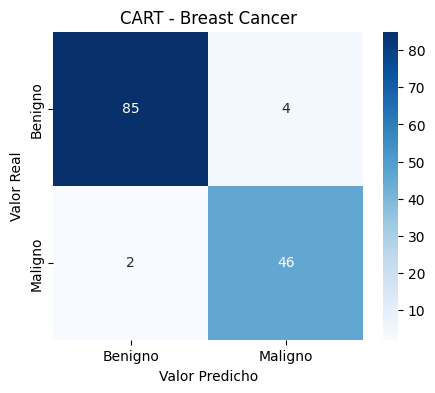

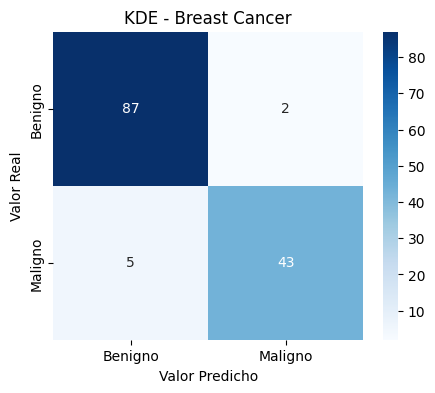

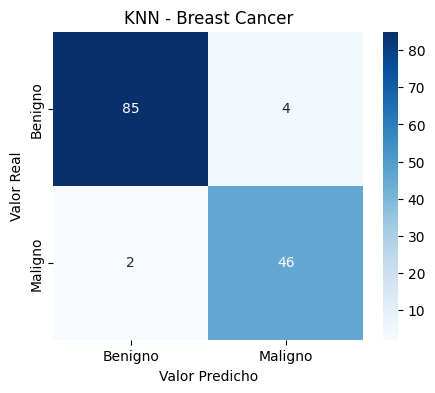

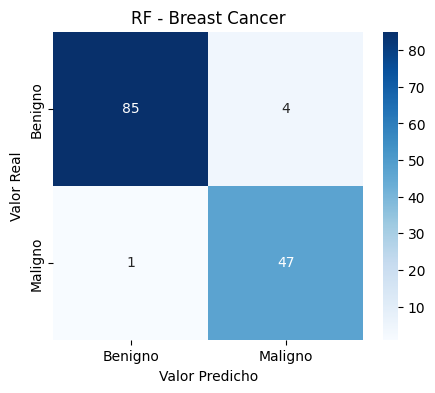

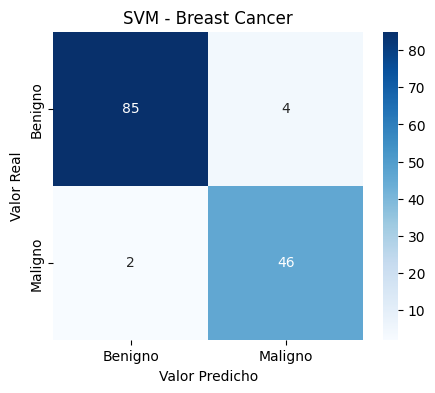

In [62]:
# Plot confussion matrices for breast_cancer
for key in breast_cancer.keys():
    conf_matrix = np.array(breast_cancer[key]['confusion_matrix'])
    key = key.upper()
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
    plt.xlabel('Valor Predicho')
    plt.ylabel('Valor Real')
    plt.title(f'{key} - Breast Cancer')
    plt.show()

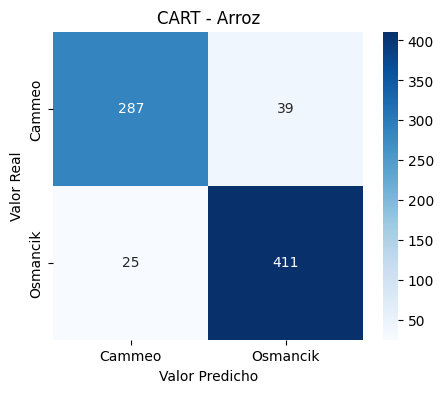

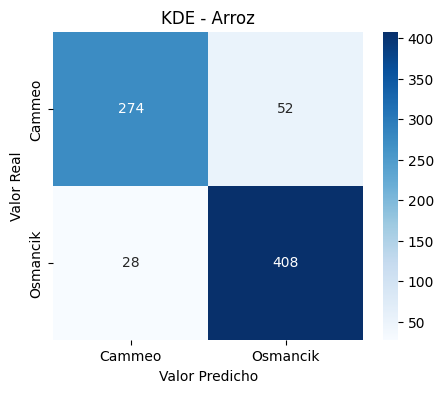

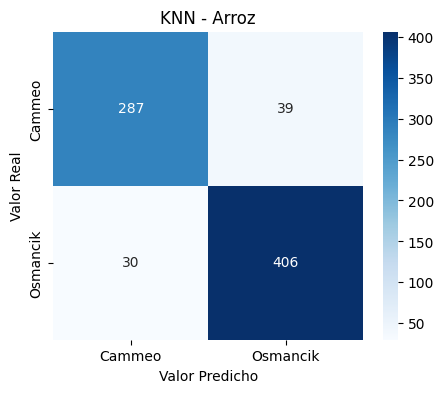

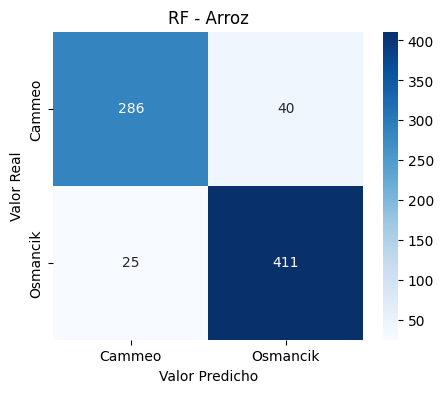

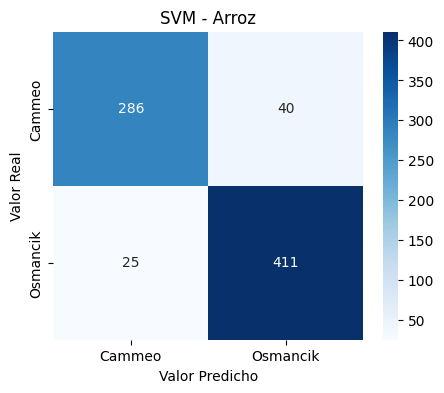

In [64]:
# Plot confussion matrices for breast_cancer
for key in rice.keys():
    conf_matrix = np.array(rice[key]['confusion_matrix'])
    key = key.upper()
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Cammeo', 'Osmancik'], yticklabels=['Cammeo', 'Osmancik'])
    plt.xlabel('Valor Predicho')
    plt.ylabel('Valor Real')
    plt.title(f'{key} - Arroz')
    plt.show()

In [67]:
def plot_multiclass_confusion_matrix(cm, class_labels, title):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
    plt.title(title)
    plt.xlabel('Valor Predicho')
    plt.ylabel('Valor Real')
    plt.show()

In [69]:
dry_bean.keys()

dict_keys(['cart', 'kde', 'knn', 'rf', 'svm'])

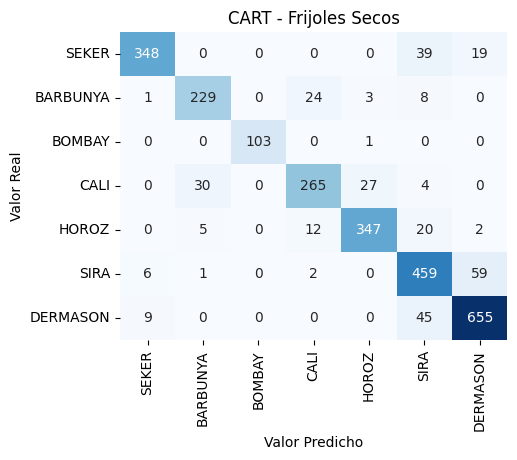

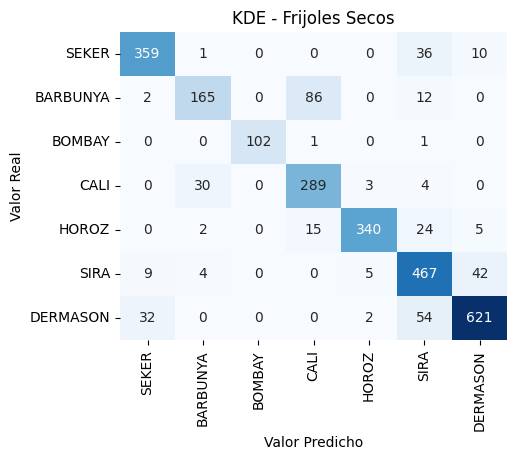

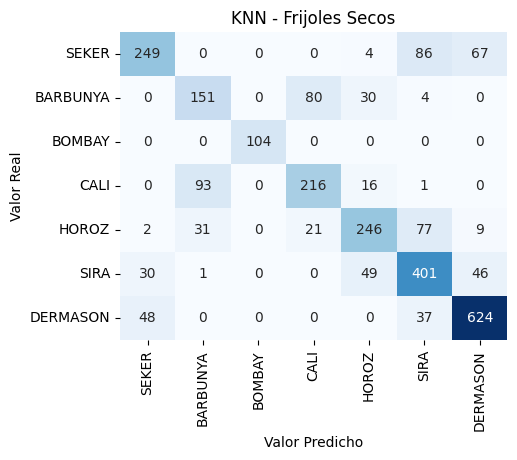

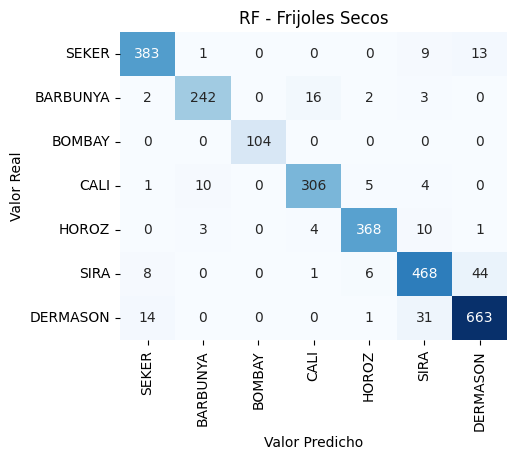

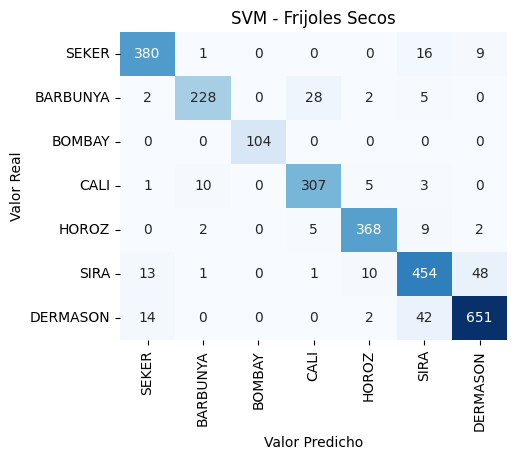

In [75]:
class_labels = ['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON']

# Plot confussion matrices for breast_cancer
for key in dry_bean.keys():
    conf_matrix = np.array(dry_bean[key]['confusion_matrix'])
    key = key.upper()
    plot_multiclass_confusion_matrix(conf_matrix, class_labels, f"{key} - Frijoles Secos")